In [ ]:
# ライブラリを読み込む
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as ptick
import japanize_matplotlib
ttf_path = japanize_matplotlib.get_font_ttf_path()

import requests
import json

headers = {"content-type": "application/json"}

In [48]:
# 世界銀行のAPIから日本の人口データを取得する
人口データURL = "http://api.worldbank.org/v2/country/jp/indicator/SP.POP.TOTL?format=json"
人口データレスポンス = requests.get(人口データURL, headers=headers)
人口データJSON = 人口データレスポンス.json()

print(json.dumps(人口データJSON, indent=2))


[
  {
    "page": 1,
    "pages": 2,
    "per_page": 50,
    "total": 62,
    "sourceid": "2",
    "sourcename": "World Development Indicators",
    "lastupdated": "2022-07-20"
  },
  [
    {
      "indicator": {
        "id": "SP.POP.TOTL",
        "value": "Population, total"
      },
      "country": {
        "id": "JP",
        "value": "Japan"
      },
      "countryiso3code": "JPN",
      "date": "2021",
      "value": 125681593,
      "unit": "",
      "obs_status": "",
      "decimal": 0
    },
    {
      "indicator": {
        "id": "SP.POP.TOTL",
        "value": "Population, total"
      },
      "country": {
        "id": "JP",
        "value": "Japan"
      },
      "countryiso3code": "JPN",
      "date": "2020",
      "value": 126261000,
      "unit": "",
      "obs_status": "",
      "decimal": 0
    },
    {
      "indicator": {
        "id": "SP.POP.TOTL",
        "value": "Population, total"
      },
      "country": {
        "id": "JP",
        "value": "Japan"
  

In [49]:
# 取得したデータからグラフで表示したい値を取り出す
西暦 = []
人口 = []
for データ in 人口データJSON[1]:
  if データ["value"]:
    西暦.append(int(データ["date"]))
    人口.append(int(データ["value"]))

print(西暦[0])
print(人口[0])

2021
125681593


In [52]:
# 世界銀行のAPIから日本の人口データを取得して値を取り出す
GDPのURL = "http://api.worldbank.org/v2/country/jp/indicator/NY.GDP.MKTP.CD?format=json"
GDPのレスポンス = requests.get(GDPのURL, headers=headers)
GDPのJSON = GDPのレスポンス.json()
西暦2 = []
GDP = []
for data in GDPのJSON[1]:
  if data["value"]:
    西暦2.append(int(data["date"]))
    GDP.append(int(data["value"]))

print(西暦2[0])
print(GDP[0])

2021
4937421880461


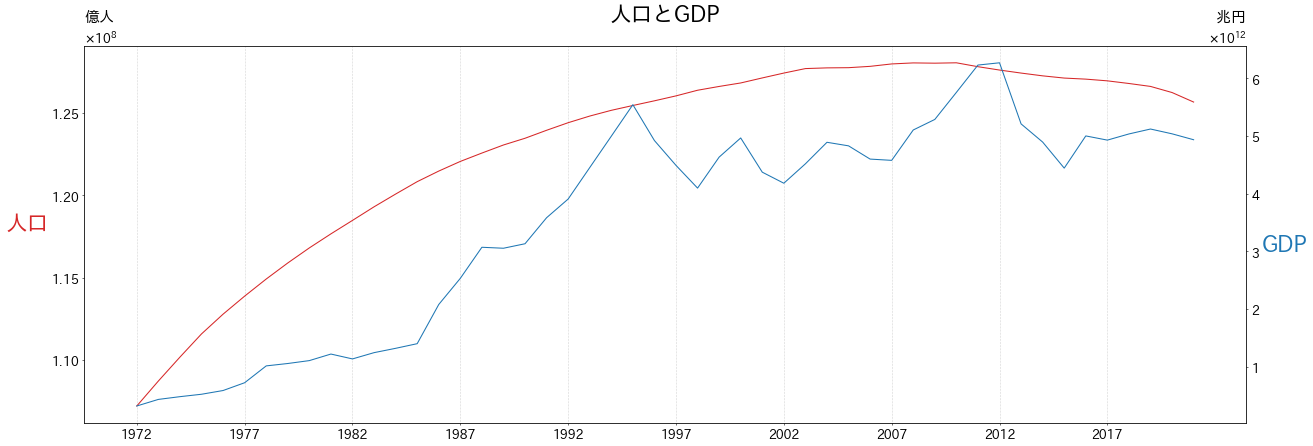

In [64]:
# グラフを描画する
# グラフのフォントサイズを指定
plt.rcParams["font.size"] = 18

# グラフを初期化
_, 人口のグラフ = plt.subplots(figsize=(30, 10), dpi=50)

人口の色 = "tab:red"

# 縦軸の設定
人口のグラフ.set_ylabel("人口", color=人口の色, size="xx-large", weight="bold",  rotation="horizontal", labelpad=35)
# 縦軸のラベルを指数表記にする
人口のグラフ.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
人口のグラフ.ticklabel_format(style="sci", axis="y", scilimits=(8,8))

# 横軸の設定
人口のグラフ.set_xticks(np.arange(西暦[-1], 西暦[0], step=5))
# 横軸に縦の目盛りを表示する
人口のグラフ.grid(axis="x", linestyle=":")

人口のグラフ.plot(西暦, 人口, color=人口の色)

GDPの色 = "tab:blue"

# 人口のグラフにGDPのグラフを重ね合わせる
人口とGDPのグラフ = 人口のグラフ.twinx()
人口とGDPのグラフ.set_ylabel("GDP", color=GDPの色, size="xx-large", weight="bold",  rotation="horizontal", labelpad=35)
人口とGDPのグラフ.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
人口とGDPのグラフ.ticklabel_format(style="sci", axis="y", scilimits=(12,12))

人口とGDPのグラフ.plot(西暦, GDP, color=GDPの色)

人口とGDPのグラフ.set_title("日本の人口とGDP", size="xx-large", weight="bold", pad=35)
人口とGDPのグラフ.set_title('億人', loc='left', pad=35)
人口とGDPのグラフ.set_title('兆円', loc='right', pad=35)

plt.show()
